This document works as a standalone for plotting the PSD data. All you need to do is download the radial PSD data in the `radial/` folder and the rest of the information is saved in the data or header cards.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
#load modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from astropy import units as u
from astropy.io import fits
from  matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.ndimage

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#print('This notebook is not stale yet!')

In [3]:
data_folder = 'radial/'
oap_labels =  ('A', 'B', 'C', 'D', 'E', 'F', 'AVG')

kr = []
pr = []
rms_ca = []
rms_beam = []
rms_dm = []

kr_unit = 1/u.m
rms_ca_unit = u.nm
rms_beam_unit = u.nm
rms_dm_unit = u.nm
pr_unit = (rms_ca_unit/kr_unit)**2

for surface_name in oap_labels:
    filename = data_folder+'psd_radial_oap{0}.fits'.format(surface_name)
    hdu = fits.open(filename)[0]
    hdr = hdu.header
    kr.append(hdu.data[0])
    pr.append(hdu.data[1])
    rms_ca.append(hdr['rms_tot'])
    rms_beam.append(hdr['rms_beam'])
    rms_dm.append(hdr['rms_dm'])

bw_beam = hdr['bw_beam']/u.m
bw_dm = hdr['bw_dm']/u.m

The bandwidth values are the spatial frequencies limit to which are "corrected". To calculate the RMS in the 2D PSD, it was integrated from the bandwidth to k_max.

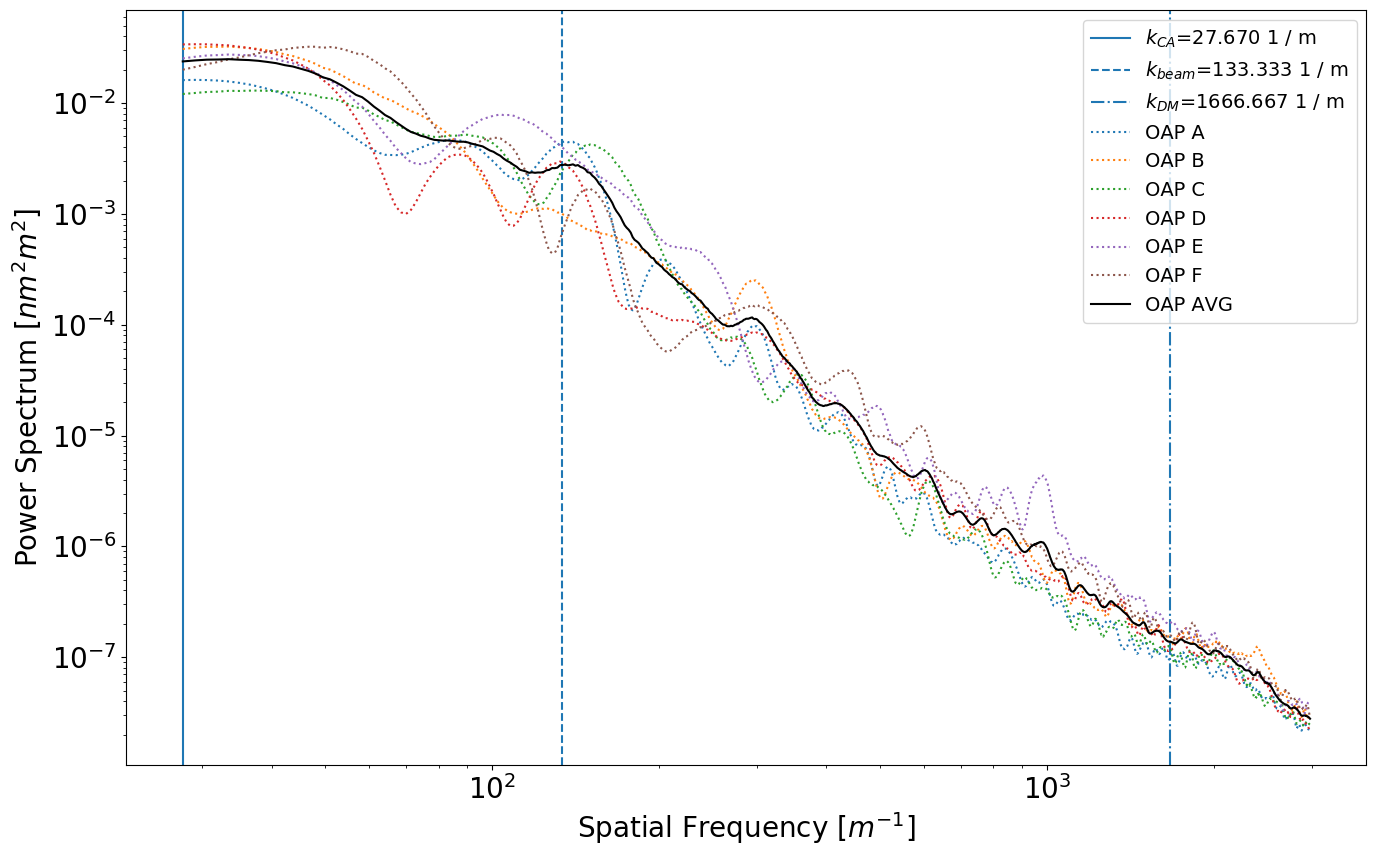

In [10]:
matplotlib.rcParams["font.size"]=20
plt.figure(figsize=[16,10], dpi=100)

# draw vertical line for the tweeter bandwith
plt.axvline(x=np.amin(kr[0]), ls='-', label='{0}={1:.3f}'.format(r'$k_{CA}$', np.amin(kr[0])*kr_unit))
plt.axvline(x=bw_beam.value, ls='--', label='{0}={1:.3f}'.format(r'$k_{beam}$', bw_beam))
plt.axvline(x=bw_dm.value, ls='-.', label='{0}={1:.3f}'.format(r'$k_{DM}$', bw_dm))

n = 0
for n in range(0, len(kr)):
    if n==len(kr)-1:
        plt.loglog(kr[n], pr[n], 'k', 
                   label='OAP {0}'.format(oap_labels[n]))
    else:
        plt.loglog(kr[n], pr[n], ':', 
                   label='OAP {0}'.format(oap_labels[n]))

plt.xlabel('Spatial Frequency [{0}]'.format(kr_unit))
#plt.ylabel('PSD [{0}]'.format(str(psd_units)))#oap[0].psd_radial_cal.unit))
plt.xlabel('Spatial Frequency [{0}]'.format(r'$m^{-1}$'))
plt.ylabel('Power Spectrum [{0}{1}]'.format(r'$nm^{2}$',r'$m^{2}$'))
#plt.title('CACTI coated OAP PSD')
plt.legend(prop={'size':14})#,loc='center left', bbox_to_anchor=(1, 0.5))

In [12]:
# print out the rms values for quick reference
# Since there are 3 different RMS values, I recommend arranging a table in the paper.
for j in range(0, len(oap_labels)):
    print('optic: OAP {0}'.format(oap_labels[j]))
    print('RMS (CA): {0:.3f}'.format(rms_ca[j]))
    print('RMS (beam): {0:.3f}'.format(rms_beam[j]))
    print('RMS (DM): {0:.3f}'.format(rms_dm[j]))
    print('-----')

optic: OAP A
RMS (CA): 19.399
RMS (beam): 11.570
RMS (DM): 1.019
-----
optic: OAP B
RMS (CA): 21.405
RMS (beam): 9.805
RMS (DM): 1.301
-----
optic: OAP C
RMS (CA): 21.625
RMS (beam): 14.221
RMS (DM): 1.058
-----
optic: OAP D
RMS (CA): 18.922
RMS (beam): 8.955
RMS (DM): 1.107
-----
optic: OAP E
RMS (CA): 24.995
RMS (beam): 13.908
RMS (DM): 1.264
-----
optic: OAP F
RMS (CA): 24.198
RMS (beam): 10.015
RMS (DM): 1.264
-----
optic: OAP AVG
RMS (CA): 21.827
RMS (beam): 11.661
RMS (DM): 1.178
-----
